###  Attempting to solve a n-p complete problem involving polygons

[Problem description](http://azspcs.com/Contest/PolygonalAreas)

#### Step 1. Check a Polygon is valid 

* No vertices should occupy the same column or row as another
* No two sides of the polygon can have the same slope
* No two sides can intersect, except at a shared vertex


#### Step 2. Create random polygons 

* Need to find largest area polygons and smallest area polygons
* This will take some thinking to avoid self intersecting polygons...

#### Step 3. Try to beat the random draws

* Start by trying a greedy algorithm, trying to optimise each vertex's placement in relation to a center point of the grid (either as close as possible given the rules, or as far as possible)

* Assuming a larger polygon must be made from an intermediatly large polygoin. (Should test this assumption) - If true, then in cases where vertexs's can be placed equidistant from the centrum, recursivley look for optimum area polygon to proceede from. 

In [231]:
import numpy as np
from random import choice
#from shapely.geometry import Polygon
import shapely

In [165]:
def choose(input_list):
    """Have to write function like this due to a scope bug in pop/remove"""
    selected = choice(input_list)
    input_list.remove(selected)
    return input_list, selected

In [232]:
def random_polygon(n):
    """Return a random polygon of n vertices in a grid of n x n
    This polygon has no rules and can be invalid.
    """
    rows = list(range(n))
    columns = list(range(n))
    bigest = None
    coordinates = []
    while len(rows) > 0:
        rows, random_row = choose(rows)
        columns, random_column = choose(columns)
        vertex = (random_row, random_column)
        coordinates.append(vertex)
    return shapely.geometry.Polygon(coordinates)
    

Self-intersection at or near point 12.675000000000001 7.5250000000000004
Self-intersection at or near point 12.675000000000001 7.5250000000000004


Invalid polygon


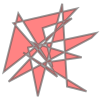

In [276]:
n = 20
polygon = random_polygon(n)
if not polygon.is_valid:
    print("Invalid polygon")
else:
    print("Polygon area: ", polygon.area)
polygon

coordinates [(4, 1), (0, 0), (1, 2), (2, 3), (3, 4)]
area 7.5
Intersects self?  True


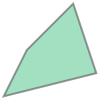

In [225]:
n = 5

# # Set up a list of n rows and columns
# rows = list(range(n))
# columns = list(range(n))
# bigest = None
# coordinates = []
# while len(rows) > 0:
#     rows, random_row = choose(rows)
#     columns, random_column = choose(columns)
#     vertex = (random_row, random_column)
#     coordinates.append(vertex)
# polygon = Polygon(coordinates)


print('area', polygon.area)
print('Intersects self? ', polygon.is_valid)
# Missing a test to see if the polygon has same angled sides...
polygon